# Dados de uma empresa de telefonia com relação a saída de clientes (Churn)



Para acessar o conjunto de dados acesse:
    https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/data

In [1]:
import numpy as np # algebra linear
import pandas as pd # processamento de dados
import seaborn as sns  # criar plots
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

sns.set(style = 'white')

import os
print(os.listdir("../trilha"))

['.ipynb_checkpoints', 'BankChurners.csv', 'caioTrilha2.ipynb', 'Caio_Churn.ipynb', 'churn.csv', 'exerciciosFuncao.ipynb', 'Prevendo_a_Perda_de_Clientes_de_Operadoras_de_Telefonia_Churn_Analysis.ipynb', 'trilha2.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Verificando as colunas
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
# Verificando os tipos de dados
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Transformando a coluna Total Charge para tipo numérico e verificando os dados ausentes.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Removendo valores nulos
telecom_cust.dropna(inplace = True)

# Removendo a coluna Customer IDs do Data set
df2 = telecom_cust.iloc[:,1:]

#Convertendo a variavel predict em binário
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)

# vamos converter as variaveis categoricas em variaveis dummy
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

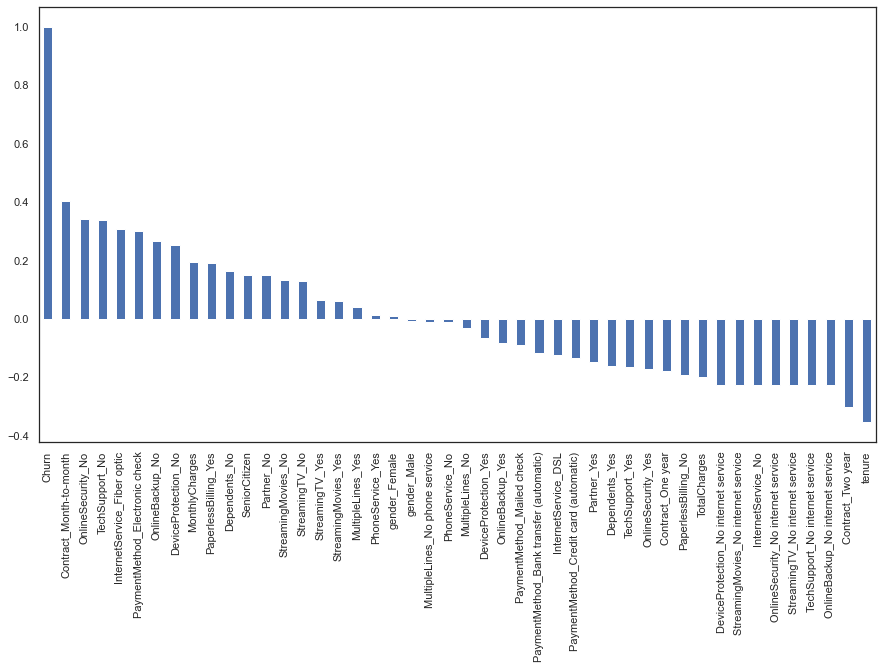

In [7]:
# Vamos ver a correlação de churn com outras variaveis
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Contratos mensais, ausência de segurança online e suporte técnico parecem estar positivamente correlacionados com o churn. Já os contratos de prazo, de dois anos, parecem estar negativamente correlacionados com o churn.

Curiosamente, serviços como segurança online, streaming de TV, backup online, suporte técnico, etc. sem conexão com a internet parecem estar negativamente relacionados ao churn.

Vamos explorar os padrões para as correlações acima antes de nos aprofundarmos na modelagem e na identificação das variáveis importantes.

# Data Exploration




Vamos começar explorando nosso conjunto de dados, para entender melhor os padrões nos dados e potencialmente formar algumas hipóteses. Primeiro, examinaremos a distribuição de variáveis individuais e, em seguida, dividiremos nossos dados em busca de tendências interessantes.

A.) Demografia - Vamos primeiro entender o sexo, faixa etária, parceiro e status de dependente dos clientes

Distribuição de gênero - Cerca de metade dos clientes em nosso conjunto de dados são do sexo masculino, enquanto a outra metade é do sexo feminino


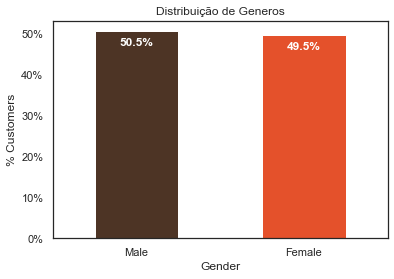

In [8]:
colors = ['#4D3425', '#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0/len(telecom_cust)).plot(kind='bar',
                                                                         stacked = True,
                                                                         rot = 0,
                                                                         color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Distribuição de Generos')

# Criamos uma lista para coletar os dados plt.patches
totals = []

# Encontramos os valores e setamos a lista
for i in ax.patches:
    totals.append(i.get_width())
    
# Definimos os rotulos de barras usando a lista acima
total = sum(totals)

for i in ax.patches:
    # get_width puxa para esquerda ou para direita; get_y para cima ou para baixo.
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1)) +'%',
            fontsize=12,
            color='white',
            weight= 'bold')


                   

### A porcentagem de idosos é de 16%, então a maioria dos clientes são jovens.


Text(0.5, 1.0, '% de Idosos')

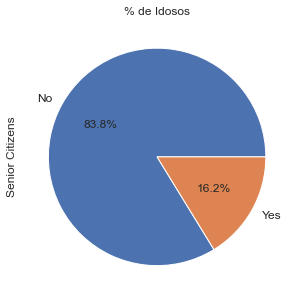

In [9]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% de Idosos', fontsize = 12)

### Status de Socios e dependentes 
50% dos clientes são sócios, enquanto 30% do total de clientes possuem dependentes.

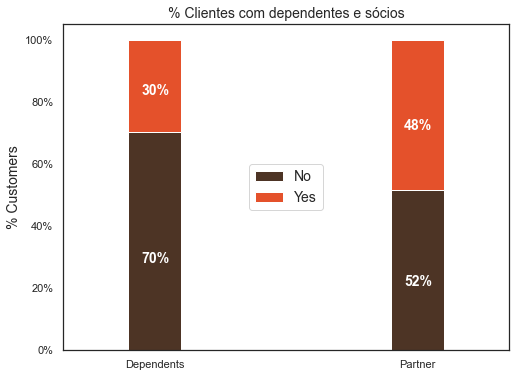

In [10]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Clientes com dependentes e sócios',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

O que seria interessante é olhar a % de clientes, que tem sócios, também tem dependentes. Exploraremos isso a seguir.

Curiosamente, entre os clientes que possuem um parceiro, apenas cerca de metade deles também possui um dependente, enquanto a outra metade não possui nenhum independente. Além disso, como esperado, entre os clientes que não possuem nenhum parceiro, a maioria (80%) deles não possui dependentes

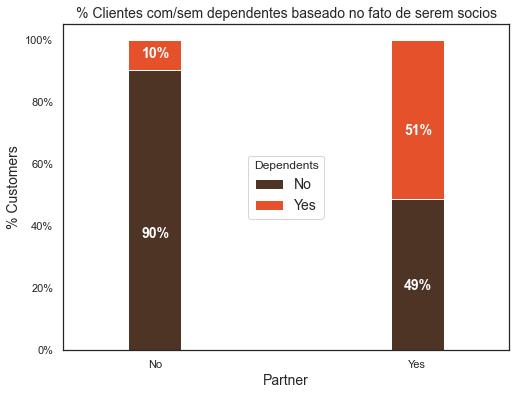

In [11]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Clientes com/sem dependentes baseado no fato de serem socios',size = 14)
ax.xaxis.label.set_size(14)

# Codigo para adicionar os rotulos de dados no gráfico de barras empilhada
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Também analisei as diferenças entre o % de clientes com/sem dependentes e parceiros por gênero. Não há diferença em sua distribuição por gênero. Além disso, não há diferença na condição de idoso por gênero.

### Informações da conta do cliente: Vamos agora olhar para a posse, contrato (Tenure)

 Contrato: Depois de observar o histograma abaixo, podemos ver que muitos clientes estão na empresa de telecomunicações há apenas um mês, enquanto muitos estão lá há cerca de 72 meses. Isso pode acontecer porque clientes diferentes têm contratos diferentes. Assim, com base no contrato em que eles estão, pode ser mais/menos mais fácil para os clientes permanecerem/saírem da empresa de telecomunicações.

c:\users\caio_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# Clientes por contrato')

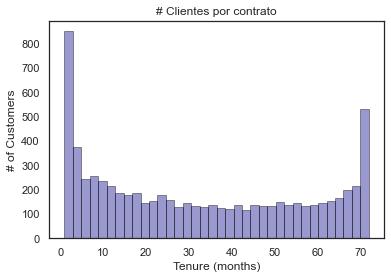

In [12]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# Clientes por contrato')

### Contratos: Para entender o gráfico acima, vejamos primeiro o número de clientes por diferentes contratos.

Text(0.5, 1.0, '# Clientes por tipos de contratos')

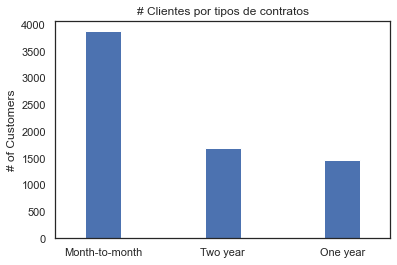

In [13]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# Clientes por tipos de contratos')

Como podemos ver neste gráfico, a maioria dos clientes está no contrato mês a mês. Enquanto há igual número de clientes nos contratos de 1 ano e 2 anos.

A seguir, entenderemos a permanência dos clientes com base em seu tipo de contrato.

Text(0.5, 1.0, 'Contrato de 2 anos')

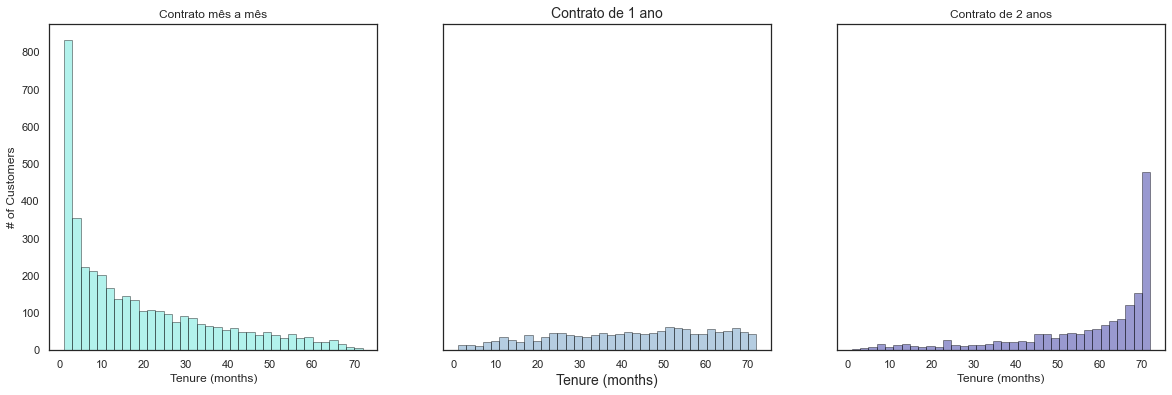

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Contrato mês a mês')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Contrato de 1 ano',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Contrato de 2 anos')

Curiosamente, a maioria dos contratos mensais duram 1-2 meses, enquanto os contratos de 2 anos tendem a durar cerca de 70 meses. Isso mostra que os clientes com contratos mais longos são mais fiéis à empresa e tendem a permanecer com ela por mais tempo.

Isso também é o que vimos no gráfico anterior sobre a correlação com a taxa de churn.

### Vejamos agora a distribuição de vários serviços utilizados pelos clientes 

In [15]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

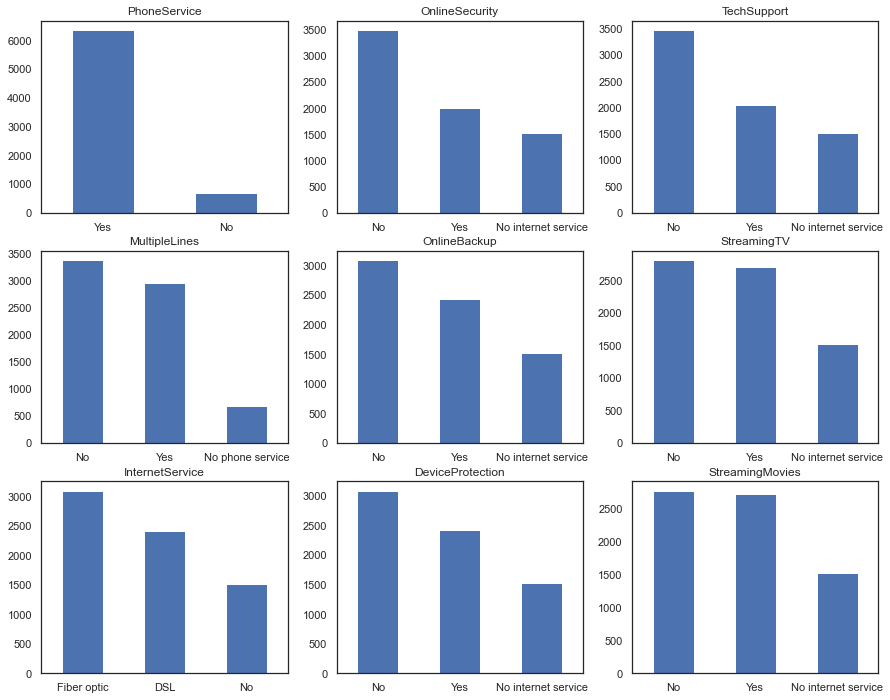

In [16]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### Agora vamos dar uma olhada rápida na relação entre as cobranças mensais e totais

Observaremos que os encargos totais aumentam à medida que a fatura mensal de um cliente aumenta.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

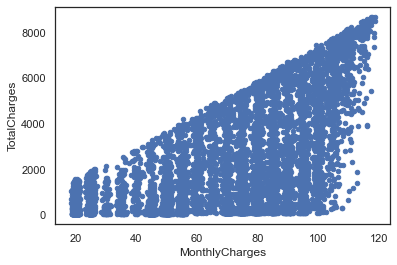

In [17]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

### Finalmente, vamos dar uma olhada em nossa variável preditora (Churn) e entender sua interação com outras variáveis importantes como foi descoberto no gráfico de correlação.

Vamos primeiro olhar para a taxa de churn em nossos dados


TypeError: Got both 'fontsize' and 'size', which are aliases of one another

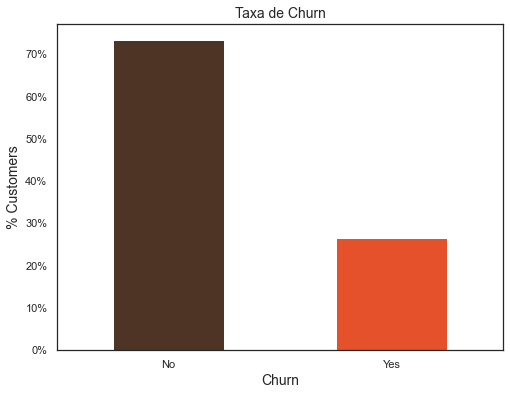

In [18]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Taxa de Churn', size = 14)

# crie uma lista para coletar os dados plt.patches
totals = []

# encontre os valores e anexe à lista
for i in ax.patches:
    totals.append(i.get_width())

# definir rótulos de barras individuais usando a lista acima
total = sum(totals)

for i in ax.patches:
    # get_width puxa para a esquerda ou para a direita; get_y empurra para cima ou para baixo
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


Em nossos dados, 74% dos clientes não abandonam. Claramente, os dados estão distorcidos, pois esperamos que a grande maioria dos clientes não se desfaça. É importante ter isso em mente para nossa modelagem, pois a assimetria pode levar a muitos falsos negativos. Veremos na seção de modelagem como evitar assimetria nos dados.

### Vamos agora explorar a taxa de churn por tempo de serviço, antiguidade, tipo de contrato, cobranças mensais e cobranças totais para ver como ela varia de acordo com essas variáveis.

Churn vs Tenure: Como podemos ver no gráfico abaixo, os clientes que não evadem, tendem a permanecer por mais tempo na empresa de telecomunicações.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

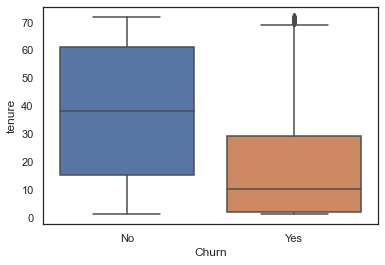

In [19]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)


Podemos evitar a alta taixa de churn com um programa para dar mais atenção ao novos clientes nos primeiros 12 meses.

### Churn por Tipo de Contrato: Semelhante ao que vimos no gráfico de correlação, os clientes que possuem contrato mês a mês têm uma taxa de churn muito alta.

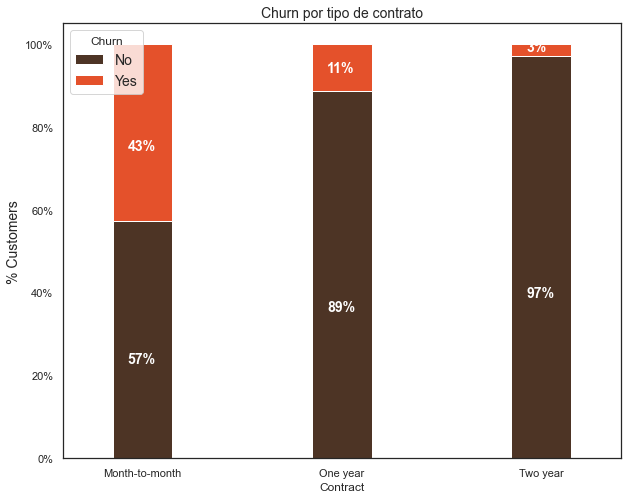

In [20]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn por tipo de contrato',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
    

### Churn por Sênioridade: os idosos têm quase o dobro da taxa de rotatividade do que a população mais jovem

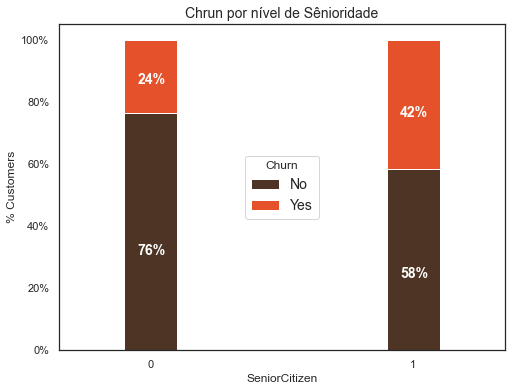

In [21]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Chrun por nível de Sênioridade',size = 14)

# Código para adicionar os rótulos de dados no gráfico de barras empilhadas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


### Churn por cobranças mensais: Maior % de desistência de clientes quando as cobranças mensais são altas.

Text(0.5, 1.0, 'Churn por distribuição de cobranças mensais')

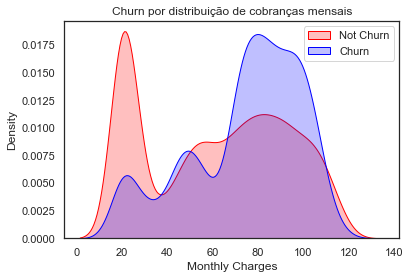

In [22]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Churn por distribuição de cobranças mensais')


### Churn por Cargas Totais: Parece que há maior churn quando as cobranças totais são menores.

Text(0.5, 1.0, 'Churn por distribuição total de cobranças')

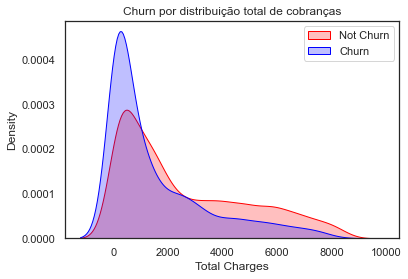

In [23]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Churn por distribuição total de cobranças')


# Regressão Logística

In [24]:
# Usaremos o data frame onde criamos variáveis dummy
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

#Escalando todas as variáveis para um range de 0 a 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


É importante dimensionar as variáveis na regressão logística de forma que todas elas estejam dentro do intervalo de 0 a 1. Isso me ajudou a melhorar a precisão de 79,7% para 80,7%. Além disso, você notará abaixo que a importância das variáveis também está alinhada com o que estamos vendo no algoritmo Random Forest e na EDA que conduzimos acima.

In [25]:
# Criando dados de Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [26]:
# Percorrendo modelo de regressão logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [27]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))


0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


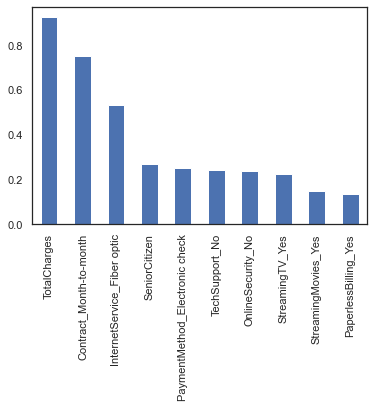

In [28]:
#Obtendo o peso de todas variáveis
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


AxesSubplot(0.125,0.125;0.775x0.755)


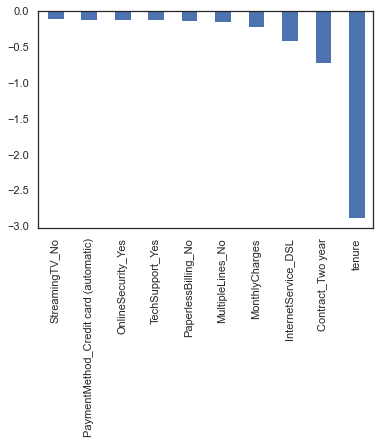

In [29]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))


Observações

Podemos ver que algumas variáveis têm uma relação negativa com nossa variável predita (Churn), enquanto algumas têm relação positiva.
Relação negativa significa que a probabilidade de churn diminui com essa variável. Vamos resumir alguns dos recursos interessantes abaixo:

Como vimos em nosso EDA, ter um contrato de 2 meses reduz as chances de churn.
O contrato de 2 meses junto com a posse tem a relação mais negativa com o Churn conforme previsto pelas regressões logísticas
Ter serviço de internet DSL também reduz a probabilidade de Churn
Por fim, cobranças totais, contratos mensais, serviços de internet de fibra óptica e idade avançada podem levar a maiores taxas de churn.
Isso é interessante porque, embora os serviços de fibra óptica sejam mais rápidos, é provável que os clientes se desfaçam por causa disso.
Acho que precisamos explorar mais para entender melhor por que isso está acontecendo.
Qualquer hipótese acima seria realmente útil!

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))


0.8088130774697939


<AxesSubplot:>

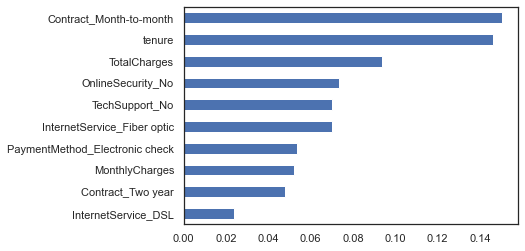

In [31]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


Observações:

Do algoritmo do Random Forest, contrato mensal, tempo de contrato e cobranças totais são as variáveis preditoras mais importantes para prever o churn.
Os resultados do Random Forest são muito semelhantes aos da regressão logística e em linha com o que esperávamos da nossa EDA.

# Support Vecor Machine (SVM)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [33]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)


0.820184790334044

In [34]:
# Criando matrix de confusão
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))


[[953  89]
 [164 201]]


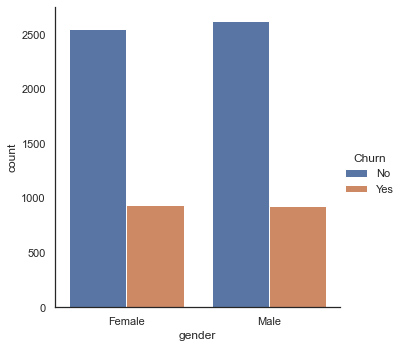

In [35]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())


# ADA Boost

In [36]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)



0.8159203980099502

# XG Boost

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)



0.8095238095238095